In [1]:
import numpy as np
from utils import GamblerProblemModel, VIApproach, plot_value_iteration, plot_policy_evolution

In [2]:
PRECISION = 4
CONVERGENCE = 10e-8

In [3]:
p = GamblerProblemModel(goal=100, success_probability=0.4)
p.n_states, p.n_nonterminal_states, p.n_actions

(101, 99, 50)

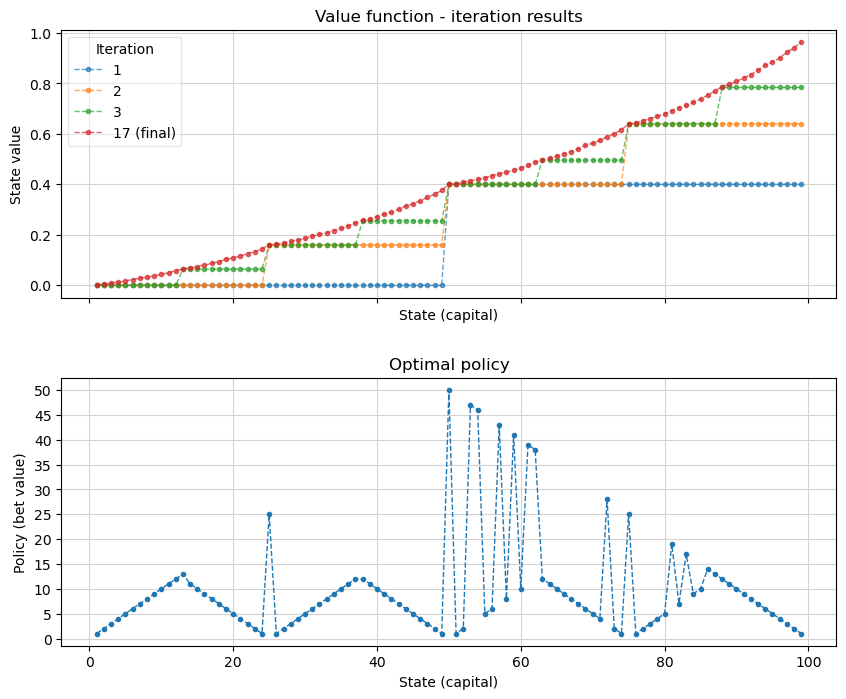

In [4]:
vec_v_track, vec_pi_track, _ = p.run_value_iteration(convergence=CONVERGENCE, keep_track=True, precision=PRECISION)
plot_value_iteration(vec_v_track, vec_pi_track)

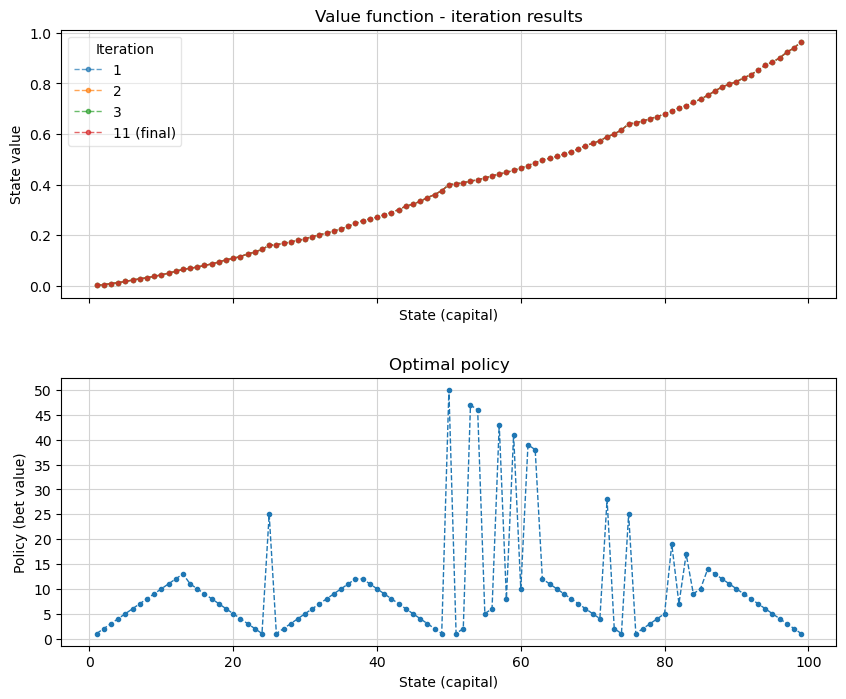

In [5]:
ip_v_track, ip_pi_track, _ = p.run_value_iteration(
    convergence=CONVERGENCE, keep_track=True, approach=VIApproach.IN_PLACE, precision=PRECISION)
plot_value_iteration(ip_v_track, ip_pi_track)


In [6]:
policy_diff = vec_pi_track[-1] - ip_pi_track[-1]
policy_diff

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
policy_diff.max(), policy_diff.min(), np.where(policy_diff, 1, 0).sum()

(np.int64(0), np.int64(0), np.int64(0))

In [8]:
values_diff = vec_v_track[-1] - ip_v_track[-1]
values_diff

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
values_diff.max(), values_diff.min(), np.where(values_diff, 1, 0).sum()

(np.float64(0.0), np.float64(0.0), np.int64(0))

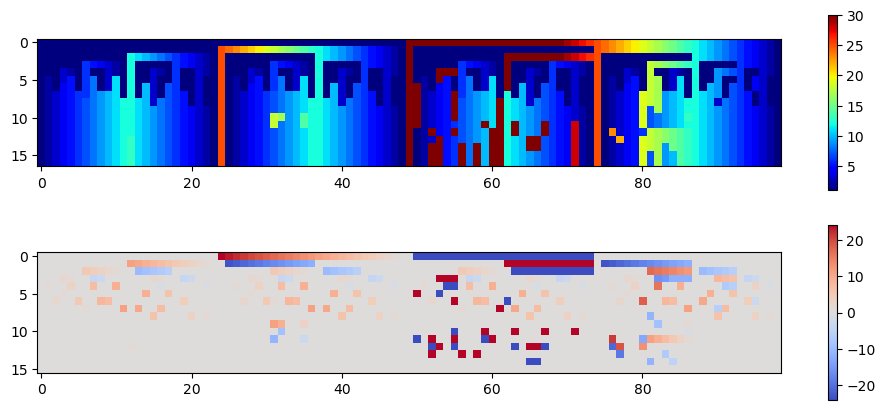

In [10]:

plot_policy_evolution(vec_pi_track)


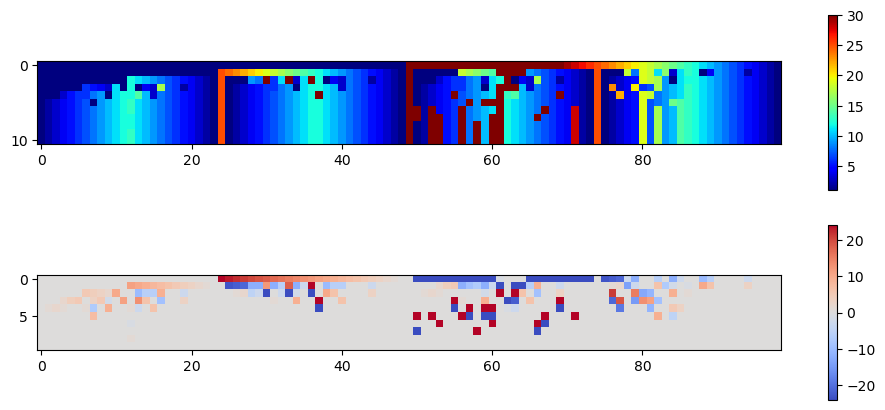

In [11]:
plot_policy_evolution(ip_pi_track)